---
title: Comparing human and rat reference gene expression
author: Sabrina Mi
date: 9/01/2023
description: There is 0.89 correlation between observed human and observed rat reference gene expression.
---


In [46]:
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
## read rat observed gene expression data
rat_tpm = pd.read_csv("/home/s1mi/enformer_rat_data/expression_data/Brain.rn7.expr.tpm.bed", sep="\t", header=0, index_col='gene_id')
rat_mean_tpm = rat_tpm.iloc[:,3:].mean(axis=1)
rat_mean_tpm.name = "rat mean tpm"

/tmp/ipykernel_145300/1109491104.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  rat_tpm = pd.read_csv("/home/s1mi/enformer_rat_data/expression_data/Brain.rn7.expr.tpm.bed", sep="\t", header=0, index_col='gene_id')


In [33]:
## read human gene expression data
human_tpm = pd.read_csv("/home/s1mi/enformer_rat_data/expression_data/gene_tpm_2017-06-05_v8_brain_cortex.gct.gz", header=2, sep="\t")
human_tpm['Name'] = human_tpm['Name'].apply(lambda gene: gene.split('.')[0])
human_tpm.set_index('Name', inplace=True)
# Calculate average gene expression
human_mean_tpm = human_tpm.drop(columns=['id', 'Description']).mean(axis=1)
human_mean_tpm.name = "human mean tpm"

In [28]:
ortho_genes = pd.read_csv("/home/s1mi/enformer_rat_data/annotation/rn7_hg38.ortholog_genes.txt", sep = "\t", index_col="ensembl_gene_id")
ortho_genes.head()

,hsapiens_homolog_ensembl_gene,external_gene_name
ensembl_gene_id,,
ENSRNOG00000033395,ENSG00000174937,Or5m3
ENSRNOG00000070901,ENSG00000167378,Irgq
ENSRNOG00000031391,ENSG00000213892,Ceacam16
ENSRNOG00000050129,ENSG00000164520,AABR07000137.1
ENSRNOG00000056886,ENSG00000199095,Mir291b


In [49]:
merged_df = ortho_genes.join(rat_mean_tpm, how="inner")
merged_df.set_index("hsapiens_homolog_ensembl_gene", inplace=True)
expr_df = merged_df.join(human_mean_tpm)
expr_df.corr()

,rat mean tpm,human mean tpm
rat mean tpm,1.000000,0.886398
human mean tpm,0.886398,1.000000


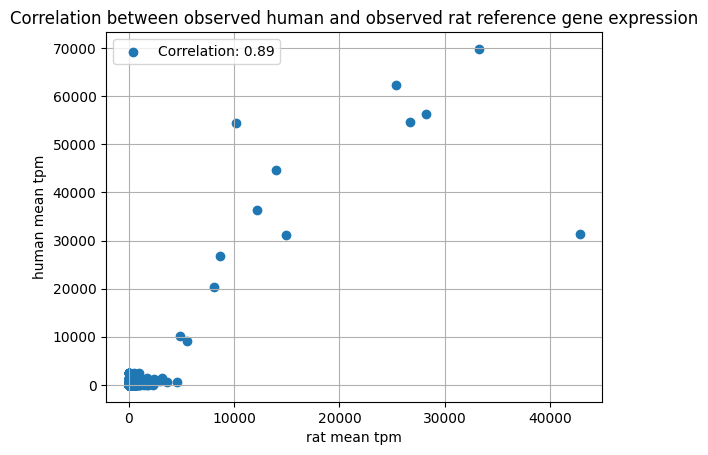

In [50]:
corr = expr_df.corr().iloc[0,1]
plt.scatter(expr_df["rat mean tpm"], expr_df["human mean tpm"], label=f'Correlation: {corr:.2f}')
plt.xlabel('rat mean tpm')
plt.ylabel('human mean tpm')
plt.title('Correlation between observed human and observed rat reference gene expression')
plt.legend()
plt.grid(True)
plt.show()